# Generating MCAR missingness

Generating 20, 40, 60, and 80% missingness with missingness mechanism MCAR. This is done using the code from paper 'Explainability of Machine Learning Models under Missing Data' https://doi.org/10.48550/arXiv.2407.00411.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the df

df_2015 = pd.read_csv('D:/2015_cleaned.csv')
df_2015_no_diabetes = df_2015.copy().drop(['diabetes'], axis=1)
df_2015_no_diabetes

,high_blood_pressure,high_cholesterol,checked_cholesterol,bmi,smoker,stroke,heart_disease,physical_activity,fruit_consumption,vegetable_consumption,...,healthcare_coverage,medical_cost,general_health,mental_health,physical_health,walking_difficulty,sex,age,education,income
0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
3,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,1.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0
4,2.0,2.0,1.0,2652.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,2.0,2.0,88.0,88.0,2.0,2.0,11.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427162,2.0,1.0,1.0,1842.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,4.0,88.0,88.0,1.0,2.0,11.0,2.0,4.0
427163,1.0,2.0,1.0,2834.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1.0,2.0,1.0,88.0,88.0,2.0,2.0,2.0,5.0,2.0
427164,2.0,1.0,1.0,4110.0,1.0,2.0,2.0,9.0,9.0,9.0,...,1.0,2.0,4.0,20.0,88.0,2.0,2.0,11.0,4.0,5.0
427165,2.0,2.0,1.0,2315.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,3.0,88.0,88.0,2.0,1.0,7.0,5.0,1.0


In [3]:
def generate_missing_data(df, rate):
    """
    :param df: complete DataFrame
    :param rate: missingness rate (value between 0 and 1)
    :return: copy of DataFrame with (Missingness rate*100%) missingness
    """

    # Create a binary mask with the same shape as df, with True values
    # at locations we want to make missing, and False values elsewhere
    mask = np.random.rand(*df.shape) < rate

    # Create a copy of the DataFrame, so we don't modify the original data
    df_missing = df.copy()

    # Apply the mask to the DataFrame, replacing True values with NaN
    df_missing[mask] = np.nan

    return df_missing

0.20952380952380956
Percentage of generated missing values:  20.020251819758805 %


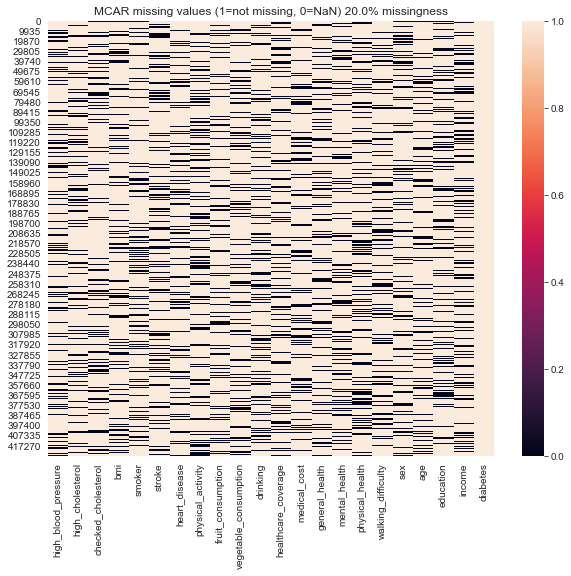

0.4190476190476191
Percentage of generated missing values:  39.999365800516166 %


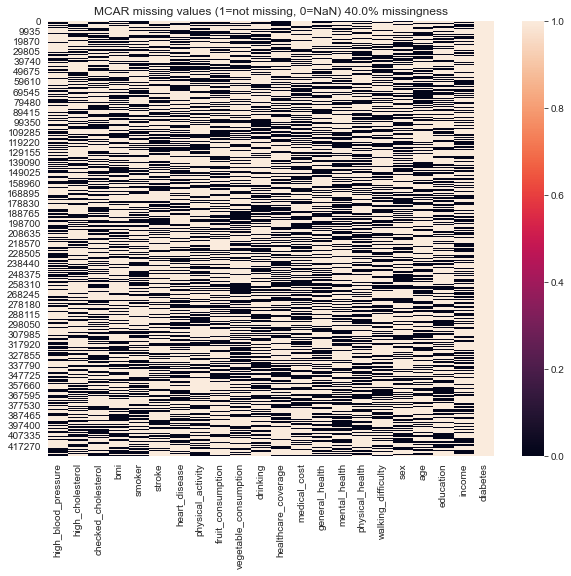

0.6285714285714286
Percentage of generated missing values:  60.01909621465907 %


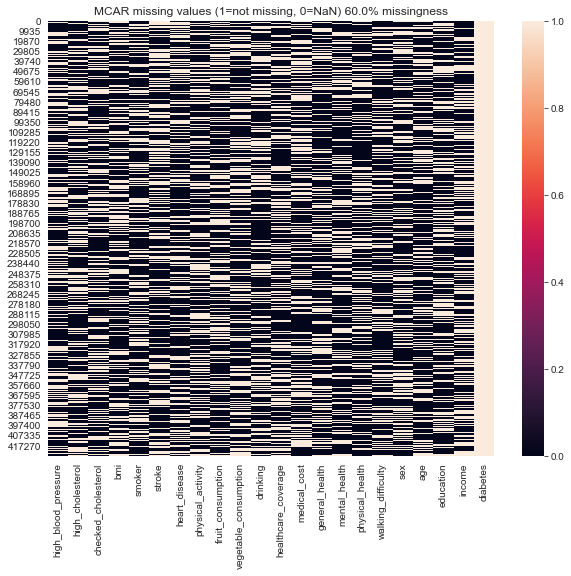

0.8380952380952382
Percentage of generated missing values:  80.01382044110063 %


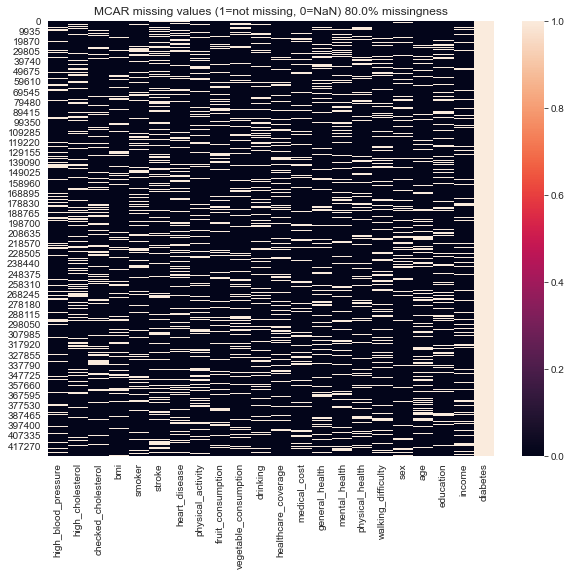

In [4]:
prop_missingess_list = [0.2, 0.4, 0.6, 0.8]
current_directory = os.getcwd()

for prop_missingness in prop_missingess_list:
    # number of columns excluding 'diabetes'
    n_columns_no_diabetes = df_2015_no_diabetes.shape[1]
    n_total_columns = df_2015.shape[1]

    # adjust the proportion of missingness to account for the fully observed 'diabetes' column
    adjusted_prop_missingness = prop_missingness * (n_total_columns / n_columns_no_diabetes)
    print(adjusted_prop_missingness)

    # generate missingness
    missing_df = generate_missing_data(df_2015_no_diabetes, adjusted_prop_missingness)
    missing_df['diabetes'] = df_2015['diabetes']

    # print the exact amount of missingness
    missing_values = missing_df.isnull().sum().sum()
    total_values = np.prod(missing_df.shape)
    percentage_missing = (missing_values / total_values) * 100
    print("Percentage of generated missing values: ", percentage_missing, "%")

    # save df with missingness
    missing_df.to_csv(current_directory+'/df_2015_MCAR_' + str(prop_missingness) + '.csv')

    # plot the missing vlaues for each column (x) and row (y) in the dataset
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(~missing_df.isnull())
    ax.set_title("MCAR missing values (1=not missing, 0=NaN) " + str(prop_missingness*100) + "% missingness")
    plt.show()